# Capstone Project - ULB Credit Card Fraud
#### Rogelio J Montemayor
## 1.1 Introduction

The goal of this project is to create a model that identifies fraudulent credit card transactions.

The version of the dataset used in this project was dowloaded from Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud.

The dataset contains transactions made by European cardholders, over two days in September 2013. The main problem with this type of problem is that the data is highly unbalanced. Only 0.173% of the transactios in this dataset are fradulent. There are 284,807 transactions of which 492 are fraudulent transactions. 

Due to privacy and confidentiality issues, features **_V1_** to **_V28_** are the principal components of the original features after PCA transformation. There are only two features that are not transformed: **_Time_** and **_Amount_**. The target variable is **_Class_**, and it takes the value of 1 in case of fraud and 0 otherwise. 

This is a classification project. 

Because the classes are so unbalanced, it is recommended to use Area Under the Precision-Recall Curve (AUPRC) to measure accuracy. The more common Area Under Receiver Operating Characteristic (AUROC) is not recommended for highly unbalanced classification.

We were able to get the best results using a Random Forest algorithm. The AUPRC of the best model was 0.8466. 

Credit card fraud increases costs for everyone and machine learning techniques can help flag fraudulent transactions and lower costs for banks, merchants and their customers.

### 1.1 Acknowledgements

My version of the dataset was dowloaded from Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (**Université Libre de Bruxelles**) on big data mining and fraud detection.

More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the [DefeatFraud](https://mlg.ulb.ac.be/wordpress/portfolio_page/defeatfraud-assessment-and-validation-of-deep-feature-engineering-and-learning-solutions-for-fraud-detection/) project.  
#### Please refer to the following papers:
Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. **_Calibrating Probability with Undersampling for Unbalanced Classification_**. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015  
Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. **_Learned lessons in credit card fraud detection from a practitioner perspective_**, Expert systems with applications, 41,10,4915-4928,2014, Pergamon  
Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. **_Credit card fraud detection: a realistic modeling and a novel learning strategy_**, IEEE transactions on neural networks and learning systems, 29,8,3784-3797,2018,IEEE  
Dal Pozzolo, Andrea **_Adaptive Machine learning for credit card fraud detection_** ULB MLG PhD thesis (supervised by G. Bontempi)  
Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. **_Scarff: a scalable framework for streaming credit card fraud detection with Spark_**, Information fusion,41, 182-194,2018,Elsevier  
Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. **_Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization_**, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing  
Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi **_Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection_**, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019  
Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi **_Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection_** Information Sciences, 2019  
Yann-Aël Le Borgne, Gianluca Bontempi Machine Learning for Credit Card Fraud Detection - Practical Handbook  

## 2. Library Imports
#### The first step is to import the libraries we are going to need in the project.
* basic libraries
* preprocessing libraries
* model selection libraries
* the models we will use

In [2]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import pickle

# import pipeline and preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer

# import model selection and metrics libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

# import the different models we are going to use
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## 3. Exploratory Analysis
### 3.1 Intial Exploration
We will explore the dataset, to get a feel for it, see what needs to be fixed, get a sense of the features, etc.

In [2]:
# read the datasets
df = pd.read_csv('creditcard.csv')

Let's look at the first five lines or our data:

In [3]:
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


And the last 5:

In [4]:
display(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


We can see that the _V1_ to _V28_ features are the principal components after a PCA transformation of the original features. _Time_ is the time in seconds between transactions and _Amount_ is the amount of the transaction.

We can see that the values in _Amount_ are in a completely different scale of the other values.

Now, we can see there are 284,807 transactions in this dataset.

In [5]:
print(df.shape)

(284807, 31)


Let's now take a look at the data type of the features:

In [6]:
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


We learn that _Time_ is 7 seconds short of 48 hours (172,800 seconds).

In [7]:
display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We can also make a mental note that _Amount_ is skewed to the right: 75% of transactions are below € 77 and the maximum transaction is for € 25,691. This will need further exploration.

There seems to be no missing values:

In [8]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


We can now confirm that the frauds are 0.173% of the transactions:

In [9]:
display(df.Class.value_counts(normalize = True))

0    0.998273
1    0.001727
Name: Class, dtype: float64

### 3.2 Visual Exploration
We can start by looking at the distributions of each of the features:

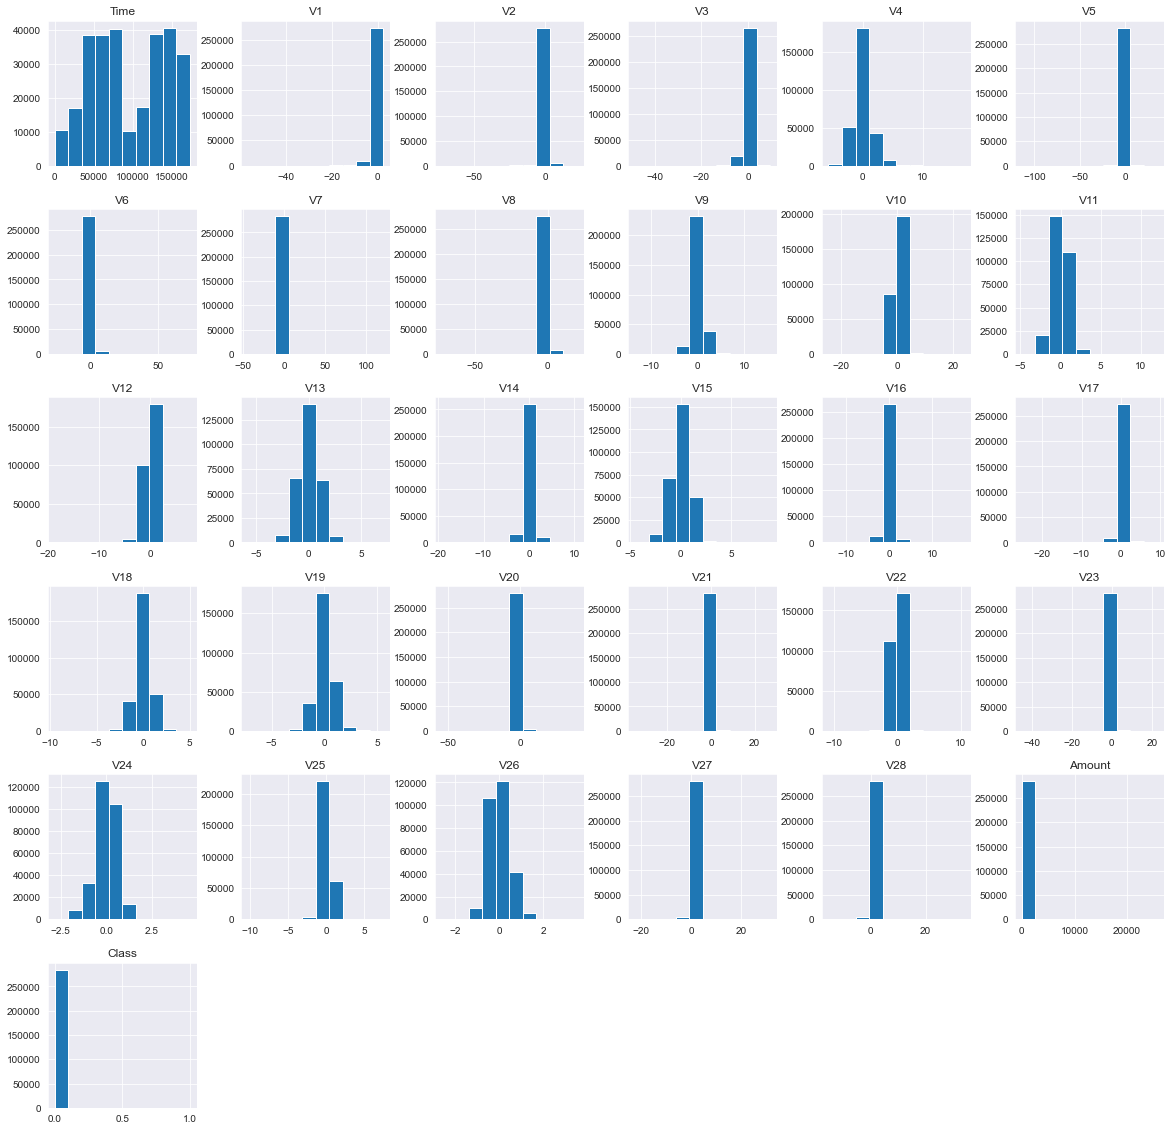

In [10]:
df.hist(figsize=(20,20), column=df.columns)
plt.show()

_V1_ to _V28_ are centered around zero, as expected. We can take a closer look at the distribution of _Time_:

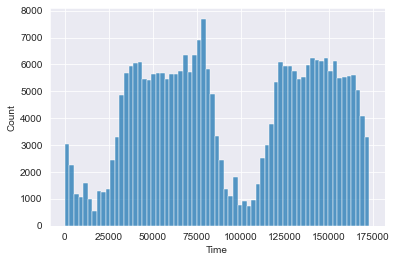

In [11]:
sns.histplot(df.Time)
plt.show()

Since we now the data represents transactions over 2 days, we can see the low points of both nights at around values 15,000 and 100,000. We can see that in more detail in the plots below:

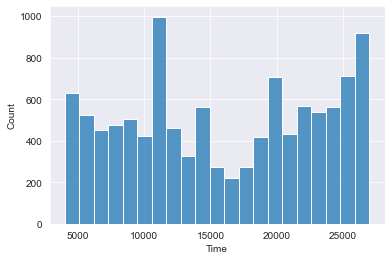

In [12]:
sns.histplot(df.Time[(df.Time > 4000) & (df.Time <= 27000)])
plt.show()

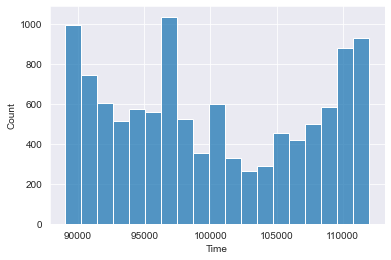

In [13]:
sns.histplot(df.Time[(df.Time > 89000) & (df.Time <= 112000)])
plt.show()

Now let's look at the distribution for _Amount_:

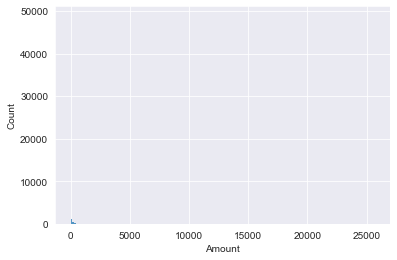

In [14]:
sns.histplot(df.Amount)
plt.show()

It seems the skewness in the distribution is affecting the plot. We can get a better look at the distribution with a violin plot, and it shows the really long right tail:

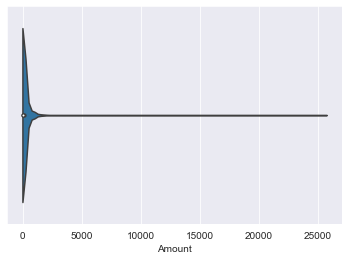

In [15]:
sns.violinplot(x='Amount', data=df)
plt.show()

One way to get a clearer picture of the data is to use a log scale:

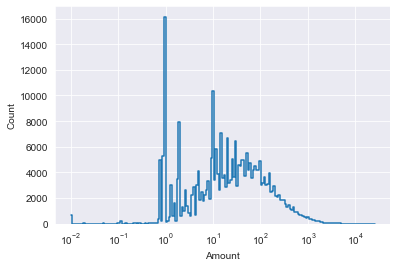

In [16]:
sns.histplot(df.Amount[df.Amount > 0], log_scale= True, element= 'step', fill= False)
plt.show()

We can make a mental note to transform this variable with a log transformation in a later step.

Now let's take a look at the correlations between variables:

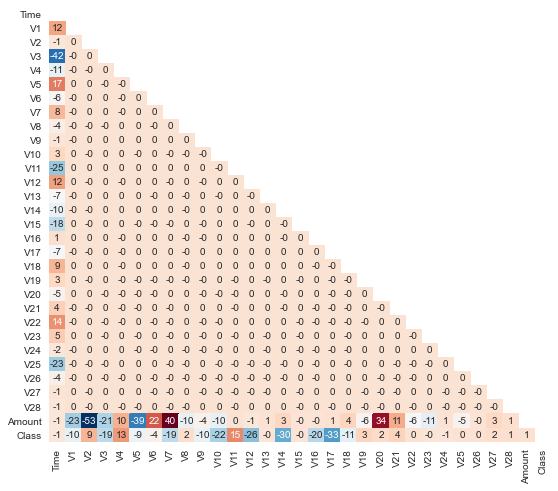

In [17]:
# calculate correlations
correlations = df.corr()

# create a mask to see only the bottom triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1

# crate the heatmap
sns.set_style('white')
plt.figure(figsize=(9,8))
sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            mask=mask,
            cbar=False)
plt.show()

The PCA principal components, per design, have 0 correlation with one another. 

Correlations between _Amount_ and all the features are small.

## 4. Data Cleaning
### 4.1 Look for duplicates
We can look for duplicates in the data:

In [18]:
duplicated_rows = df[df.duplicated()]
display(duplicated_rows)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


We can eliminate those duplicates. Confirm it worked.

In [19]:
df.drop_duplicates(inplace=True)
display(df.shape)

(283726, 31)

### 4.2 Let's explore transforming _Amount_
On our exploration, we saw that we can get a better sense of the distribution of _Amount_ using log scale on the x axis. Let's explore using a power transformation on the data itself. We will use PowerTransformer.

The resulting plot looks like almost exactly like the one with made before:

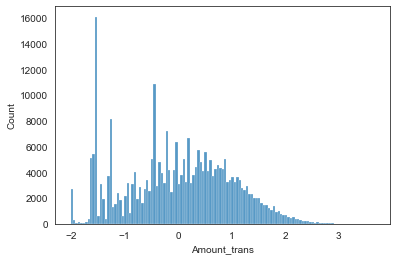

In [20]:
amount = df['Amount'].values
amount = amount.reshape(-1,1)
power = PowerTransformer()
df['Amount_trans'] = power.fit_transform(amount)
sns.histplot(df.Amount_trans)
plt.show()

The default method for PowerTransformer is 'yeo-johnson'. I tried to use 'box-cox' since we should have positive only values in our variable, and I discovered there are a few zeroes in the _Amount_ variable:

In [21]:
sum(df.Amount == 0)

1808

#### What to do with those zeroes?
It would be interesting to talk to the creators of the dataset and find out how does it happen that the transaction value es 0? Was it a very small value that got rounded down to 0? Was it a missing value that was filled with 0?

It could be that it adds information to keep the 0s in, but without more information and given there are just a few of them, I will get rid of those, so they do not add noise to our transformations later on.

In [22]:
# first replace 0s with NA
df.Amount.replace(0, np.NaN, inplace=True)

# then drop those NAs
df.dropna(subset=['Amount'], inplace=True)
df.Amount.isna().sum()

0

In [23]:
df.shape

(281918, 32)

We lost 2,889 observations (1,081 + 1,808), which is about 1% of our data. We can live with that.

## 5. Feature Engineering

### 5.1 _Time_ Variable
The _Time_ variable records the seconds elapsed for a given transaction from the first one in the dataset. It does not make sense to me that people making fraudulent transactions have knowledge of all the transactions taking place at that time. So any relationship would be just coincidence. 

In my opinion, leaving the feature as is would be just adding noise to our dataset. But I think it could make sense to add a feature that encodes wheter a transaction happened during the night, during those two ~7 hour long periods of low transactions that we discovered in our visual exploration. 

We will create the _Night_ feature, that will have value of 1 if the transaction happened in either window of time or 0 otherwise.

In [24]:
df['Night'] = (df.Time.between(4000, 27000) | df.Time.between(89000, 112000)).astype(int)

We can see that only about 8% of transactions happened at "night", eventhough those two periods (12.8 hours) represent almost 27% of the time elapsed.

In [25]:
df.Night.sum()

21904

Let's take another look at our dataset:

In [26]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_trans,Night
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.117873,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-1.129040,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.622430,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.011323,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.691723,0


It is better to transform our data once we have split it into Train and Test sets, to prevent data leakage. So we will drop that column and perform our transformation again in the modeling stage. 

As discussed, we will also drop _Time_.

In [27]:
df.drop(['Time', 'Amount_trans'], axis=1,inplace=True)

Verify everything looks right:

In [28]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Night
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


### 5.3 Create ABT
We create an **analytical base table (ABT)** at this point, to have a base for our modeling after the data cleaning and feature engineering steps. It serves as a checkpoint in our analysis. 

In [29]:
df.to_csv('analytical_base_table.csv', index=None)

## 6. Algorithm Selection

#### Classification problem
This is a binary classification problem.  

#### Algorithms to test
We will use the following algorithms and see which one performs best:

* L1 regularized Logistic Regression
* L2 regularized Logistic Regression
* Linear Discriminant Analysis
* Random Forest Classifier
* Gradient Boosting Classifier

The first two are regularized variations of Logistic regression that is a good choice in binary classification problems like this.

LDA is a classification algorithm that is closely related to PCA, so we will include it in our tests.

Random Forest and Gradient Boosting Classifiers are normally good choices in classification problems. 

#### Hyperparameter tuning
For both L1 and L2 regularized Logistic Regression we will tune the C parameter. C is the inverse of the regularization strength.

For LDA, we will tune shrinkage, using the least square solution solver.

For the Random Forest Regressor we will focus on the number of trees, the number of features, and the minimum samples per leaf.

For the Gradient Boosting Regressor we will tune the number of estimators, the learning rate and the maximum depth.

## 7. Model Training
Now that we have selected our algorithms, we can start to train them on the data. The first step is to separte the features from our target variable:

stratify=y in train_test_split Box-cox amount in X_Train and X_test before make_pipeline

In [9]:
# load ABT
df = pd.read_csv('analytical_base_table.csv')

# Create X and y tables
y = df.Class
X = df.drop('Class', axis=1)

We can now split our data into train and test data. 

We will keep 20% for testing. We will train our model using the train split. 

Since our data is unbalanced, it is very important to stratify our split. We are also setting random_state to 775 for reproducibility.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=775)

We can see that the proportion of fraudulent transactions is almost the same for the training and test sets:

In [32]:
display(y_train.sum()/len(X_train), y_test.sum()/len(X_test))

0.0015873438151232187

0.0015961975028376844

### 7.1 Preprocessing
It is a good idea to bring all our features in to a similar scale using StandardScaler. For the _Amount_ feature, we will perform a box-cox transformation to bring the distribution closer to a normal one, and then StandardScaler.

Since we will be performing different preprocessing steps for different features, we will use ColumnTransformer to join the different preprocessing steps into one that we will name _preprocessor_ and use it later in our pipelines.

In [33]:
amount_feature = ['Amount']
amount_transformer = Pipeline(steps=[
    ('power', PowerTransformer(method='box-cox')),
    ('scaler', StandardScaler())
])

other_features = list(X_train.columns)
other_features.remove('Amount')
other_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('amt', amount_transformer, amount_feature),
        ('other', other_transformer, other_features)
    ])

#### Create pipelines dictionary
With this dictionary, we can keep our pipelines for each algorithm in the same place. We will set random_state to 111 for reproducibility.

In [34]:
pipelines = {
    'l1' : make_pipeline(preprocessor, LogisticRegression(solver='liblinear', penalty='l1', random_state=111)),
    'l2' : make_pipeline(preprocessor, LogisticRegression(solver='liblinear', penalty='l2',random_state=111)),
    'lda' : make_pipeline(preprocessor, LinearDiscriminantAnalysis(solver='lsqr')),
    'rf' : make_pipeline(preprocessor, RandomForestClassifier(random_state=111)),
    'gb' : make_pipeline(preprocessor, GradientBoostingClassifier(random_state=111))
}

As a sanity check, let's confirm that the pipelines were created:

In [35]:
for pipeline in pipelines:
    print(pipeline, type(pipelines[pipeline]))

l1 <class 'sklearn.pipeline.Pipeline'>
l2 <class 'sklearn.pipeline.Pipeline'>
lda <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


#### Create hyperparameters dictionary
The next step will be to train our algorithms. We will create a dictionary with the hyperparameters to tune for each algorithm. As an intermediate step, I like to take a look at the tunable parameters for each algorithm so that we can:
* get the name of the hyperparameter correctly
* make sure not to miss an important hyperparameter

In [36]:
for pipeline in pipelines:
    display(pipelines[pipeline].get_params())

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('amt',
                                    Pipeline(steps=[('power',
                                                     PowerTransformer(method='box-cox')),
                                                    ('scaler', StandardScaler())]),
                                    ['Amount']),
                                   ('other', StandardScaler(),
                                    ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                     'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                     'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                     'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                     'V27', 'V28', 'Night'])])),
  ('logisticregression',
   LogisticRegression(penalty='l1', random_state=111, solver='liblinear'))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('amt',
                                    Pipeline(steps=[('power',
                                                     PowerTransformer(method='box-cox')),
                                                    ('scaler', StandardScaler())]),
                                    ['Amount']),
                                   ('other', StandardScaler(),
                                    ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                     'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                     'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                     'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                     'V27', 'V28', 'Night'])])),
  ('logisticregression',
   LogisticRegression(random_state=111, solver='liblinear'))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('amt',
    

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('amt',
                                    Pipeline(steps=[('power',
                                                     PowerTransformer(method='box-cox')),
                                                    ('scaler', StandardScaler())]),
                                    ['Amount']),
                                   ('other', StandardScaler(),
                                    ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                     'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                     'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                     'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                     'V27', 'V28', 'Night'])])),
  ('lineardiscriminantanalysis', LinearDiscriminantAnalysis(solver='lsqr'))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('amt',
              

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('amt',
                                    Pipeline(steps=[('power',
                                                     PowerTransformer(method='box-cox')),
                                                    ('scaler', StandardScaler())]),
                                    ['Amount']),
                                   ('other', StandardScaler(),
                                    ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                     'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                     'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                     'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                     'V27', 'V28', 'Night'])])),
  ('randomforestclassifier', RandomForestClassifier(random_state=111))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('amt',
                   

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('amt',
                                    Pipeline(steps=[('power',
                                                     PowerTransformer(method='box-cox')),
                                                    ('scaler', StandardScaler())]),
                                    ['Amount']),
                                   ('other', StandardScaler(),
                                    ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                     'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                     'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                     'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
                                     'V27', 'V28', 'Night'])])),
  ('gradientboostingclassifier',
   GradientBoostingClassifier(random_state=111))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('amt',
        

#### Create tuning grid
After checking, we can create the hyperparameter grid. First we create a dictionary for each algorithm with the hyperparameters we want to tune and the values to use.

In [37]:
l1_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}
l2_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}
lda_hyperparameters = {
    'lineardiscriminantanalysis__shrinkage': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
}
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

We create a dictionary with all the hyperparameter dictionaries to keep everything in one place:

In [38]:
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'lda' : lda_hyperparameters,
    'rf' : rf_hyperparameters,  
    'gb' : gb_hyperparameters
}

### 7.2 Model fitting and evaluation
With this setup, it is straight forward to loop over our dictionary, train each algorithm and tune the hyperparameters all in one step. We will use 10 fold cross-validation.

##### Note: Beware the following cell took 27 hours to run.

In [39]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted')

l1 has been fitted
l2 has been fitted
lda has been fitted
rf has been fitted
gb has been fitted


#### Choose the best performing algorithm
It seems that Random Forest gets the best results.

In [40]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.9992639697763593
l2 0.9992639697763593
lda 0.9994280242343712
rf 0.9995566076760667
gb 0.9992151928284123


#### Accuracy is not a good metric for highly unbalanced classes
We can see that all 5 algorithms have an accuracy higher than 99.921%. But since only 0.173% of the transactions are of class 1 (fraud) then a naive classifier that always predicted 0 should score 99.827%.

A better measure of the performance of our algorithms is the average precision score. Average precision score summarizes the precision-recall curve as the weighted mean of precisions achieved at each threshold. This is a much better measurement for this kind of dataset.

Let's calculate this metric for each of our algorithms:

In [41]:
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)[:,1]
    print(name, average_precision_score(y_test, pred))

l1 0.7282481505691858
l2 0.7283222585395187
lda 0.696888490376084
rf 0.8466099550532806
gb 0.6217080427439878


#### Pick the best algorithm
Random Forest performed the best with an average precision score of 0.8466.

We can also take a look at the parameters that worked best for this algorithm:

In [45]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('amt',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer(method='box-cox')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Amount']),
                                                 ('other', StandardScaler(),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                           

#### Visualize precision-recall curve
Let's take a look at the precision-recall curve four our best model:

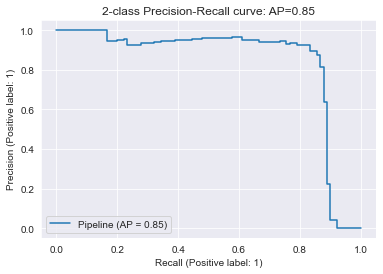

In [11]:
disp = plot_precision_recall_curve(fitted_models['rf'], X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(0.846609955))
plt.show()

#### Save the final model
Let's create a pickle file of our best model:

In [47]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

## 8. Insights & Analysis

Random forest beat boosted trees, regularized logistic regression, and LDA approaches. 

Our current model has an average precision score of 0.8466.

This model could be further improved in several ways:
* Investigate the possibility of using even more data, so we can train our model with even more fraudulent transactions.
* With the original features, we could look into better feature engineering to try to improve the score.
* Try other algorithms or even create an ensemble of different models to see if we can get better results.
* With a more powerful computer or cluster, run more hyperparamter tuning.